##### Name : Uma Mounika K
##### Roll No : BF18BDV010

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import re
import math
movies=pd.read_csv("/home/uma/Downloads/movies.csv")

/home/uma/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Task-1 Removing non- movies

In [2]:
new_m=movies[movies['Type']=="movie"] 

### Task-2 Converting runtimes to minutes

In [3]:
def toMins(a):
    s=str(a)
    mins=float('nan')
    m=re.match(r"(\d+)\s+h\s+(\d+)\s+m\w+",s)
    if m is not None:
        mins=float(m.groups()[0])*60+float(m.groups()[1])
    m=re.match(r"(\d+)\s+m\w+",s)
    if m is not None:
        mins=float(m.groups()[0])
    return mins
new_m['Runtime']=list(map(toMins,new_m['Runtime']))

/home/uma/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


### Task-3 Plotting histograms of log(features)

/home/uma/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/uma/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


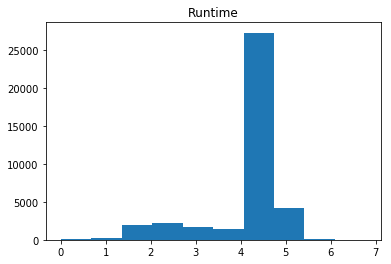

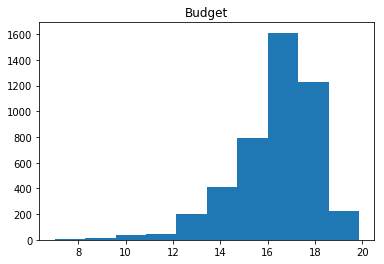

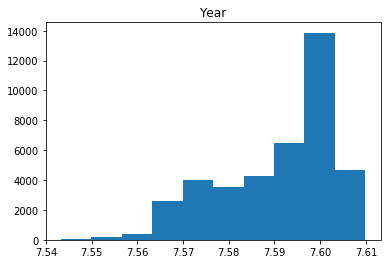

In [4]:
for i in list(new_m[['Runtime','Budget','Year']].columns):
    x=new_m[i].apply(np.log)
    plt.hist(x,range=[x.min(),x.max()])
    plt.title(i)
    plt.show()

### Task-4 Converting Awards to Wins and Nominations

In [5]:
def winNomin(a):
    a=str(a)
    n_b=re.findall(r"nominated\sfor\s\d+",a,re.I|re.M)
    n_a=re.findall(r"\d+\s+nomination\w+",a,re.I|re.M)
    w_b=re.findall(r"won\s\d+",a,re.I|re.M)
    w_a=re.findall(r"\d+\s+win\w+",a,re.I|re.M)
    nominations=0
    wins=0
   
    if len(n_b)!=0:
        nominations+=int(re.match(r"\w+\s+\w+\s+(\d+)",n_b[0]).groups()[0])
    if len(n_a)!=0:
        nominations+=int(re.match(r"(\d+)\s+\w+",n_a[0]).groups()[0])
    if len(w_b)!=0:
        wins+=int(re.match(r"\w+\s+(\d+)",w_b[0]).groups()[0])
    if len(w_a)!=0:
        wins+=int(re.match(r"(\d+)\s+\w+",w_a[0]).groups()[0])
    return wins,nominations
w_n=list(map(winNomin,new_m['Awards']))
w_fi=[k for k,v in w_n]
n_fi=[v for k,v in w_n]
new_m['Wins']=w_fi
new_m['Nominations']=n_fi

/home/uma/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/uma/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Task-5 Converting Genres to features (binary encoding)

In [6]:
genres=[]
for i in new_m['Genre']:
    s=str(i).split(',')
    for k in range(len(s)):
        genres.append(s[k].strip().lower())
        
genres_unique=set(genres)

genre_values={}
for i in genres_unique:
    cn="genre_"+i
    new_m[cn]=np.nan
    genre_values[cn]=[]
    
cn=""
gen=new_m.iloc[:,:]['Genre']
b=gen.index
for i in b:
    gen_str=str(gen[i])
    gr=gen_str.split(',')
    gr=[x.strip().lower() for x in gr]
    gr_set=set(gr)
    for j in gr_set:
        cn="genre_"+j
        if j in genres_unique:
            genre_values[cn].insert(i,1)
    for j in (genres_unique-gr_set):
        cn="genre_"+j
        genre_values[cn].insert(i,0)
        
for i in genre_values:
    new_m[i]=genre_values[i]

/home/uma/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/uma/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Task - 6 Plotting Top 10 Genres

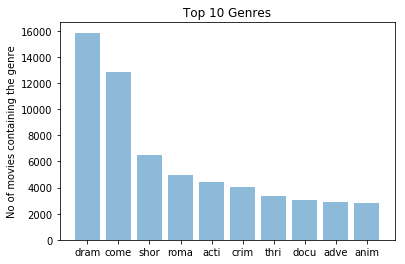

In [7]:
one_counter={}
c=0
for i in genre_values:
    c=0
    for j in genre_values[i]:
        if j==1:
            c+=1
    one_counter[i]=c
    
import operator
sorted_d = sorted(one_counter.items(), key=operator.itemgetter(1),reverse=True)

genres = [k[6:10] for k,v in sorted_d[:10]]
y_pos = np.arange(len(genres))
performance = [v for k,v in sorted_d[:10]]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, genres)
plt.ylabel('No of movies containing the genre')
plt.title('Top 10 Genres')
 
plt.show()

### Task - 7 Finding Corelation among various features

In [8]:
new_m['Runtime'].corr(new_m['Year'])

0.23087341605959

In [9]:
new_m['Gross'].corr(new_m['Budget'])

0.7419124839791144

In [10]:
new_m['Gross'].corr(new_m['Runtime'])

0.2601187348677783

In [11]:
new_m['Gross'].corr(new_m['Wins'])

0.31281761758119675

In [12]:
new_m['Gross'].corr(new_m['Nominations'])

0.3652119180248888

In [13]:
new_m['tomatoRating'].corr(new_m['imdbRating'])

0.7938417239203808

In [14]:
new_m['imdbRating'].corr(new_m['Wins'])

0.18736841836515747

In [15]:
new_m['imdbRating'].corr(new_m['Nominations'])

0.16438555828366405

In [16]:
new_m['Budget'].corr(new_m['Year'])

0.1728890702726726

### Task-8 Dropping rows with Missing Gross Values

In [17]:

new_m=new_m[new_m['Gross'].isna()==False]
new_m.shape

(4558, 71)

### Task -9 Excluding movies prior to year 2000

In [18]:


new_m=new_m[new_m['Year'] > 2000]
new_m.shape

(3163, 71)

### Task -10 Modelling to predict Gross values using numeric attributes. Plot Learning curve and R^2 plot for each test and train split

###### Creating a new dataframe with only numeric attributes

In [19]:
new_m_number=new_m._get_numeric_data()

##### Various Columns still possess null values. Detecting those columns.Replacing NAs with mean value of the column

In [20]:
for i in new_m_number.columns:
    if new_m_number[i].isnull().values.any():
        m=new_m_number[i].mean(axis=0,skipna=True)
        new_m_number[i]=new_m_number[i].apply(lambda x: m if math.isnan(x) else x)

##### Dropping the genre_nan column 

In [21]:
new_m_number.drop(labels="genre_nan",axis=1,inplace=True)

##### Building the model and R^2 value

In [22]:
X=new_m_number[[x for x in new_m_number.columns if x!='Gross']]
y=new_m_number['Gross']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
rgr= LinearRegression(normalize=True)
rgr.fit(X_train,y_train)
print("model :",rgr)
print("co - efficient :",rgr.coef_)
print("intercept :",rgr.intercept_)

y_predictions=rgr.predict(X_test)
print(" R squared :",rgr.score(X_test,y_test))

model : LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
co - efficient : [ 7.63787720e+00 -4.12909654e+06  3.13109183e+04  1.29034716e+05
  9.56135835e+05  3.71200433e+01  1.81875246e+05 -1.41458443e+06
 -7.74050254e+04 -6.32252204e+04 -7.18197295e+04 -2.24506969e+05
  5.48910904e+06 -4.03914026e-01 -1.31130219e-06  7.99429525e-01
  2.04868078e+00  5.96973226e+06  2.15418852e+05  3.79802554e+04
 -5.04841943e+06  2.67695377e+06  7.15255737e-07 -2.31785781e+06
  0.00000000e+00  2.18088018e+06  9.52673964e+06  1.60556782e+06
 -3.11530977e+05 -6.77674343e+06 -1.73444327e+07  2.66021012e+07
  2.10303288e+07 -8.43680547e+06 -3.57627869e-07  5.06686376e+06
  8.02908114e+06  6.46869241e+04 -6.49973618e+06  8.01063072e+06
 -3.51313568e+06 -2.55006541e+07 -1.08905842e+07  1.14733670e+07
 -1.75288181e+07  0.00000000e+00 -4.63531589e+06  8.42115602e+06]
intercept : -3723370056.488455
 R squared : 0.9169477086108935


##### Using K-fold for splitting the dataset and plotting R^2 plot

Linear model :  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
 R squared : 0.9117886456149593
Linear model :  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
 R squared : 0.9013844620816271
Linear model :  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
 R squared : 0.9340021895725552
Linear model :  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
 R squared : 0.9089042280142658
Linear model :  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
 R squared : 0.9155851717900537
Linear model :  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
 R squared : 0.9106364284975018
Linear model :  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
 R squared : 0.922221996926729
Linear model :  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
 R squared : 0.881061147256469
Linear mod

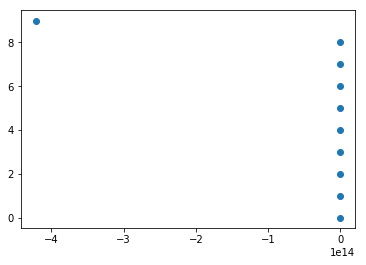

In [23]:
r_sq=[]
rgr= LinearRegression(normalize=True)
fold=KFold(n_splits=10, random_state=42, shuffle=False)
X_a=X.values
y_a=y.values
for train_index,test_index in fold.split(X):
    X_train=X_a[train_index]
    X_test= X_a[test_index]
    y_train=y_a[train_index]
    y_test=y_a[test_index]
    rgr.fit(X_train,y_train)
    print("Linear model : ",rgr)
    y_pred=rgr.predict(X_test)
    print(" R squared :",rgr.score(X_test,y_test))
    r_sq.append(rgr.score(X_test,y_test))

print(r_sq)
r_sq_in=[i for i,x in enumerate(r_sq)]
plt.scatter(r_sq,r_sq_in)

##### Plotting Learning Curve

In [24]:
cv=ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
train_sizes, train_scores, test_scores =learning_curve(rgr, X.values, y.values,
                   train_sizes=np.linspace(0.1, 1.0, 5),
                   cv=5,n_jobs=-1)

In [25]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

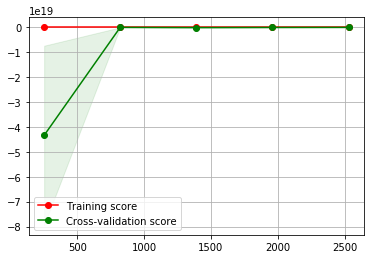

In [26]:
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")

### Task -11 Transformation of features 

In [27]:

new_m_number_T=new_m_number.copy()

##### Boxcox Transformation

In [29]:
col=[]
for i in new_m_number_T.columns:
    n=re.findall(r"genre_(\w+)",i.strip(),re.I|re.M)
    if len(n)==0:
        col.append(i.strip())
for i in col[:6]:
    print(i)
    new_m_number_T[i]=stats.boxcox(new_m_number[i])[0]
for i in col[7:9]:
    print(i)
    new_m_number_T[i]=stats.boxcox(new_m_number[i])[0]
for i in col[14:16]:
    print(i)
    new_m_number_T[i]=stats.boxcox(new_m_number[i])[0]
for i in col[17:18]:
    print(i)
    new_m_number_T[i]=stats.boxcox(new_m_number[i])[0]
for i in col[20:]:
    print(i)
    new_m_number_T[i]=stats.boxcox(new_m_number[i])[0]

Unnamed: 0
Year
Runtime
Metascore
imdbRating
imdbVotes
tomatoRating
tomatoReviews
Response
Budget
Gross


/home/uma/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:900: RuntimeWarning: divide by zero encountered in log
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
/home/uma/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1926: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
/home/uma/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


ValueError: Data must be positive.

##### Scaling

In [30]:
scaler = MinMaxScaler()
new_m_number_T[list(new_m_number_T.columns)] = scaler.fit_transform(new_m_number_T[list(new_m_number_T.columns)])
print(new_m_number_T.head())

    Unnamed: 0      Year   Runtime  Metascore  imdbRating  imdbVotes  \
12    0.000000  0.242573  0.424501   0.089598    0.026529   0.427738   
20    0.002537  0.242573  0.419894   0.278384    0.204865   0.378539   
26    0.004143  0.242573  0.526224   0.380221    0.344731   0.476382   
27    0.004393  0.242573  0.466032   0.540546    0.316516   0.331568   
28    0.004639  0.242573  0.470654   0.550481    0.453498   0.296057   

    tomatoMeter  tomatoRating  tomatoReviews  tomatoFresh      ...        \
12         0.01      0.072000       0.391648     0.002915      ...         
20         0.11      0.251195       0.388767     0.037901      ...         
26         0.30      0.406618       0.536069     0.145773      ...         
27         0.37      0.493020       0.385883     0.125364      ...         
28         0.54      0.555732       0.397395     0.186589      ...         

    genre_war  genre_animation  genre_sci-fi  genre_sport  genre_comedy  \
12        0.0              0.0     

##### Re building MOdel with Transformed features

Linear model :  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
 R squared : 0.8960013122675489
Linear model :  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
 R squared : 0.8864375094071201
Linear model :  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
 R squared : 0.9308534141152752
Linear model :  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
 R squared : 0.8962691434180154
Linear model :  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
 R squared : 0.8966707116011097
Linear model :  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
 R squared : 0.8969455800505873
Linear model :  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
 R squared : 0.9115420864006457
Linear model :  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
 R squared : 0.8777329661103173
Linear m

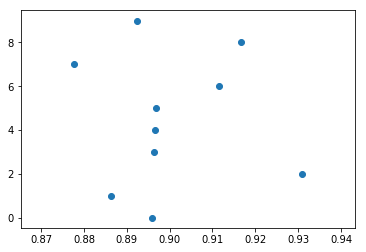

In [31]:
X=new_m_number_T[[x for x in new_m_number.columns if x!='Gross']]
y=new_m_number_T['Gross']
r_sq=[]
rgr= LinearRegression(normalize=True)
fold=KFold(n_splits=10, random_state=42, shuffle=False)
X_a=X.values
y_a=y.values
for train_index,test_index in fold.split(X):
    X_train=X_a[train_index]
    X_test= X_a[test_index]
    y_train=y_a[train_index]
    y_test=y_a[test_index]
    rgr.fit(X_train,y_train)
    print("Linear model : ",rgr)
    y_pred=rgr.predict(X_test)
    print(" R squared :",rgr.score(X_test,y_test))
    r_sq.append(rgr.score(X_test,y_test))

print(r_sq)
r_sq_in=[i for i,x in enumerate(r_sq)]
plt.scatter(r_sq,r_sq_in)

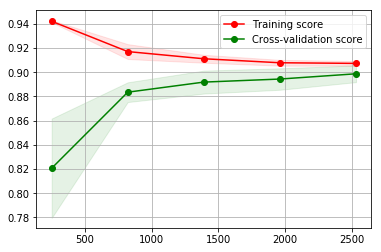

In [32]:
cv=ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
train_sizes, train_scores, test_scores =learning_curve(rgr, X.values, y.values,
                   train_sizes=np.linspace(0.1, 1.0, 5),
                   cv=5,n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
#plt.ylim((-2,1.01))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")

### Task - 13 Converting 3 categorical Columns to Binary Columns and building a model.

In [33]:
new_m.info(),new_m_number.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3163 entries, 12 to 40404
Data columns (total 71 columns):
Unnamed: 0           3163 non-null int64
Title                3163 non-null object
Year                 3163 non-null int64
Rated                2921 non-null object
Released             3122 non-null object
Runtime              3163 non-null float64
Genre                3161 non-null object
Director             3152 non-null object
Writer               3096 non-null object
Actors               3144 non-null object
Plot                 3131 non-null object
Language             3152 non-null object
Country              3159 non-null object
Awards               2565 non-null object
Poster               3108 non-null object
Metascore            3163 non-null float64
imdbRating           3163 non-null float64
imdbVotes            3163 non-null float64
imdbID               3163 non-null object
Type                 3163 non-null object
tomatoMeter          3163 non-null float64
tomato

(None, None)

##### Choosing the below 3 Columns for Categories

In [34]:

new_m['Rated'],new_m['Country'],new_m['Language']

(12               R
 20              PG
 26           PG-13
 27           PG-13
 28              PG
 37           PG-13
 43       NOT RATED
 46             NaN
 50           PG-13
 51               R
 52           PG-13
 56         UNRATED
 61           PG-13
 68              PG
 72           PG-13
 82           PG-13
 85               R
 93           PG-13
 97               R
 102              R
 104          PG-13
 106              R
 107              R
 112              G
 115          NC-17
 125          PG-13
 126              R
 132              R
 141          PG-13
 147              R
            ...    
 40342            R
 40343            R
 40345           PG
 40346            R
 40347          NaN
 40348        PG-13
 40349            R
 40350            R
 40351        PG-13
 40352        PG-13
 40353        PG-13
 40356        PG-13
 40357            R
 40358            G
 40359            R
 40361        PG-13
 40362        PG-13
 40363        PG-13
 40364        PG-13


##### Transforming the rated column to binary encoding

In [35]:
rated=[]
for i in new_m['Rated']:
    i=str(i).split(",")
    for j in i:
        rated.append(j.strip().lower())
rated_set=set(["rated_"+x.strip().lower() for x in rated])

In [36]:

rated_values={}
rated=new_m.iloc[:,:]['Rated']
for i in rated_set:
    new_m[i]=np.nan
    rated_values[i]=[]  

In [37]:
b=rated.index
for i in b:
    rat_str=str(rated[i])
    rr=rat_str.split(',')
    r=["rated_"+x.strip().lower() for x in rr]
    r_set=set(r)
    for j in r_set:
        if j in rated_set:
            rated_values[j].insert(i,1)
    for j in (rated_set-r_set):
        rated_values[j].insert(i,0)

In [38]:
for i in rated_values:
    new_m[i]=rated_values[i]

##### Binary Encoding of Country column

In [39]:
country=[]
for i in new_m['Country']:
    i=str(i).split(",")
    for j in i:
        country.append(j.strip().lower())
country_set=set(["country_"+x.strip().lower() for x in country])

country_values={}
country=new_m.iloc[:,:]['Country']
for i in country_set:
    new_m[i]=np.nan
    country_values[i]=[] 
    
b=country.index
for i in b:
    countryr=["country_"+x.strip().lower() for x in str(country[i]).split(',')]
    countryr_set=set(countryr)
    for j in countryr_set:
        if j in country_set:
            country_values[j].insert(i,1)
    for j in (country_set-countryr_set):
        country_values[j].insert(i,0)

In [40]:
for i in country_values:
    new_m[i]=country_values[i]

##### Binary encoding of Language Column

In [41]:
lang=[]
for i in new_m['Language']:
    i=str(i).split(",")
    for j in i:
        lang.append(j.strip().lower())
lang_set=set(["lang_"+x.strip().lower() for x in lang])

lang_values={}
lang=new_m.iloc[:,:]['Language']
for i in lang_set:
    new_m[i]=np.nan
    lang_values[i]=[] 
    
b=lang.index
for i in b:
    langr=["lang_"+x.strip().lower() for x in str(lang[i]).split(',')]
    langr_set=set(langr)
    for j in langr_set:
        if j in lang_set:
            lang_values[j].insert(i,1)
    for j in (lang_set-langr_set):
        lang_values[j].insert(i,0)

In [42]:
for i in lang_values:
    new_m[i]=lang_values[i]

##### Getting the numeric data from original dataset

In [43]:
new_m_number=new_m._get_numeric_data()

##### Setting NAs to mean of the column value

In [44]:
for i in new_m_number.columns:
    if new_m_number[i].isnull().values.any():
        m=new_m_number[i].mean(axis=0,skipna=True)
        new_m_number[i]=new_m_number[i].apply(lambda x: m if x==math.isnan(x) else x)

##### Dropping nan encoded columns

In [45]:
new_m_number.drop(labels="genre_nan",axis=1,inplace=True)
new_m_number.drop(labels="rated_nan",axis=1,inplace=True)
new_m_number.drop(labels="country_nan",axis=1,inplace=True)
new_m_number.drop(labels="lang_nan",axis=1,inplace=True)
new_m_number.drop(labels="rated_unrated",axis=1,inplace=True)
new_m_number.drop(labels="rated_not rated",axis=1,inplace=True)

##### Transforming the Features

In [46]:
new_m_number_T=new_m_number.copy()
col=[]
for i in new_m_number_T.columns:
    n=re.findall(r"(\w+)_(\w+)",i.strip(),re.I|re.M)
    if len(n)==0:
        col.append(i.strip())
for i in col[:6]:
    print(i)
    new_m_number_T[i]=stats.boxcox(new_m_number[i])[0]
for i in col[7:9]:
    print(i)
    new_m_number_T[i]=stats.boxcox(new_m_number[i])[0]
for i in col[14:16]:
    print(i)
    new_m_number_T[i]=stats.boxcox(new_m_number[i])[0]
for i in col[17:18]:
    print(i)
    new_m_number_T[i]=stats.boxcox(new_m_number[i])[0]
for i in col[20:]:
    print(i)
    new_m_number_T[i]=stats.boxcox(new_m_number[i])[0]

Unnamed: 0
Year
Runtime
Metascore
imdbRating
imdbVotes
tomatoRating
tomatoReviews
Response
Budget
Date


/home/uma/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:900: RuntimeWarning: divide by zero encountered in log
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
/home/uma/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1926: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
/home/uma/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


##### Scaling the features

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_m_number_T[list(new_m_number_T.columns)] = scaler.fit_transform(new_m_number_T[list(new_m_number_T.columns)])
print(new_m_number_T.head())

    Unnamed: 0      Year   Runtime  Metascore  imdbRating  imdbVotes  \
12    0.000000  0.242573  0.424501   0.089598    0.026529   0.427738   
20    0.002537  0.242573  0.419894   0.278384    0.204865   0.378539   
26    0.004143  0.242573  0.526224   0.380221    0.344731   0.476382   
27    0.004393  0.242573  0.466032   0.540546    0.316516   0.331568   
28    0.004639  0.242573  0.470654   0.550481    0.453498   0.296057   

    tomatoMeter  tomatoRating  tomatoReviews  tomatoFresh     ...      \
12         0.01      0.072000       0.391648     0.002915     ...       
20         0.11      0.251195       0.388767     0.037901     ...       
26         0.30      0.406618       0.536069     0.145773     ...       
27         0.37      0.493020       0.385883     0.125364     ...       
28         0.54      0.555732       0.397395     0.186589     ...       

    lang_british sign language  lang_tonga  lang_hebrew  lang_danish  \
12                         0.0         0.0          0.0 

##### Rebuilding the model and plotting R^2 plot

Linear model :  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
 R squared : -1.0640865580292596e+26
Linear model :  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
 R squared : -5.010281498345652e+26
Linear model :  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
 R squared : -6.459591104091247e+25
Linear model :  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
 R squared : -1.62112967966471e+26
Linear model :  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
 R squared : -5.923607579265955e+25
Linear model :  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
 R squared : -3.3342404476621404e+26
Linear model :  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
 R squared : -1.6172484711439806e+25
Linear model :  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
 R squared

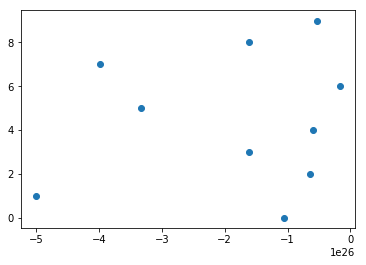

In [48]:
X=new_m_number_T[[x for x in new_m_number.columns if x!='Gross']]
y=new_m_number_T['Gross']
r_sq=[]
rgr= LinearRegression(normalize=True)
fold=KFold(n_splits=10, random_state=42, shuffle=False)
X_a=X.values
y_a=y.values
for train_index,test_index in fold.split(X):
    X_train=X_a[train_index]
    X_test= X_a[test_index]
    y_train=y_a[train_index]
    y_test=y_a[test_index]
    rgr.fit(X_train,y_train)
    print("Linear model : ",rgr)
    y_pred=rgr.predict(X_test)
    print(" R squared :",rgr.score(X_test,y_test))
    r_sq.append(rgr.score(X_test,y_test))

print(r_sq)
r_sq_in=[i for i,x in enumerate(r_sq)]
plt.scatter(r_sq,r_sq_in)

##### Plotting Learning Curve

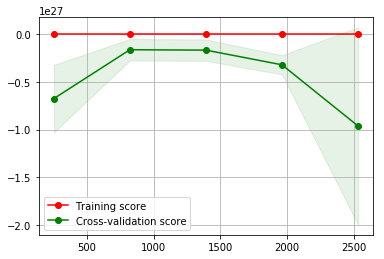

In [49]:
cv=ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
train_sizes, train_scores, test_scores =learning_curve(rgr, X.values, y.values,
                   train_sizes=np.linspace(0.1, 1.0, 5),
                   cv=5,n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
#plt.ylim((-2,1.01))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")